In [5]:
import sys
sys.version

'3.7.10 (default, Jun  4 2021, 06:52:02) \n[GCC 9.3.0]'

In [6]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [7]:
!echo $SKLEARNEX_VERBOSE

INFO


In [8]:
import pandas as pd
from sklearn import cluster
import os
import seaborn as sns

In [9]:
data_dir='/opt/notebooks/QA_attentions_pickled'

In [10]:
df = pd.read_csv(os.path.join(data_dir,'representation_df.csv'))

In [11]:
df_small = df[:14400]

In [12]:
%%time
kmeans_dataset1 = cluster.KMeans(n_clusters=80, 
                                 init='k-means++').fit_predict(df_small)

SKLEARNEX INFO: sklearn.cluster.KMeans.fit: running accelerated version on CPU
CPU times: user 10min 3s, sys: 2.44 s, total: 10min 5s
Wall time: 1min 26s


/opt/conda/envs/idp3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


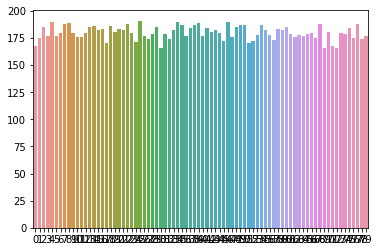

In [13]:
df_labels = pd.DataFrame(kmeans_dataset1)
rating_count = df_labels[0].value_counts()

x = rating_count.index
y = rating_count.values

sns.barplot(x, y)

In [15]:
%%time
kmeans_dataset_large = cluster.KMeans(n_clusters=30, 
                                 init='k-means++').fit_predict(df)

SKLEARNEX INFO: sklearn.cluster.KMeans.fit: running accelerated version on CPU
CPU times: user 5h 3min 45s, sys: 1min 17s, total: 5h 5min 2s
Wall time: 42min 20s


/opt/conda/envs/idp3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


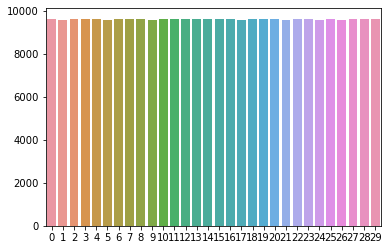

In [16]:
df_labels = pd.DataFrame(kmeans_dataset_large)
rating_count = df_labels[0].value_counts()

x = rating_count.index
y = rating_count.values

sns.barplot(x, y)